In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
import openpyxl

In [189]:
data=pd.read_excel('dummy_data.xlsx',header=0)

In [190]:
data

,Oil Methane,Oil Ethane,Oil Propane,Oil N-butane,Oil N-pentane,Oil N-dodecane,Oil Temperature,Oil Pressure,Gas Methane,Gas Ethane,Gas Propane,Gas N-butane,Gas N-pentane,Gas N-dodecane,Gas Temperature,Gas Pressure,Volumetric Flow,Molar Entropy (Mixture),Lean Gas Density (Mixture)
0,0.000,0.000,0.000,0.000,0.000,1.000,25,30,0.154,0.300,0.460,0.050,0.018,0.000,25,28,1637.1100,11.91090,1.31249
1,0.160,0.160,0.160,0.160,0.160,0.160,25,20,0.160,0.160,0.160,0.160,0.160,0.160,15,14,1002.8300,-11.43670,3.58983
2,0.375,0.125,0.125,0.125,0.125,0.125,20,20,0.125,0.125,0.125,0.125,0.375,0.125,20,18,550.9950,7.04624,6.53364
3,0.200,0.200,0.200,0.200,0.000,0.200,25,10,0.200,0.000,0.200,0.200,0.200,0.200,35,40,310.6440,-3.85933,11.58880
4,0.300,0.300,0.100,0.000,0.300,0.000,15,5,0.000,0.300,0.000,0.100,0.300,0.300,10,15,24.1024,-477.62300,149.36300


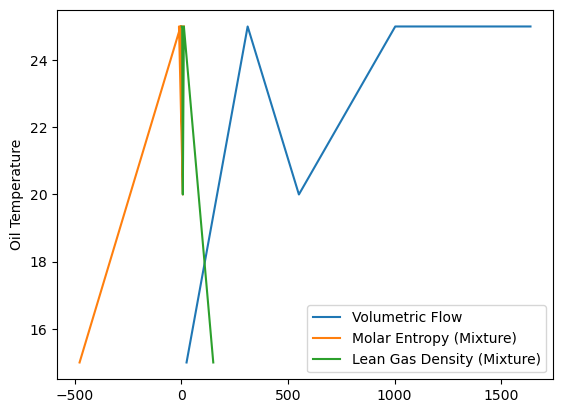

In [191]:
plt.plot(data['Volumetric Flow'],data['Oil Temperature'],label='Volumetric Flow')
plt.plot(data['Molar Entropy (Mixture)'],data['Oil Temperature'],label='Molar Entropy (Mixture)')
plt.plot(data['Lean Gas Density (Mixture)'],data['Oil Temperature'],label='Lean Gas Density (Mixture)')
plt.ylabel("Oil Temperature")
plt.legend()
plt.show()

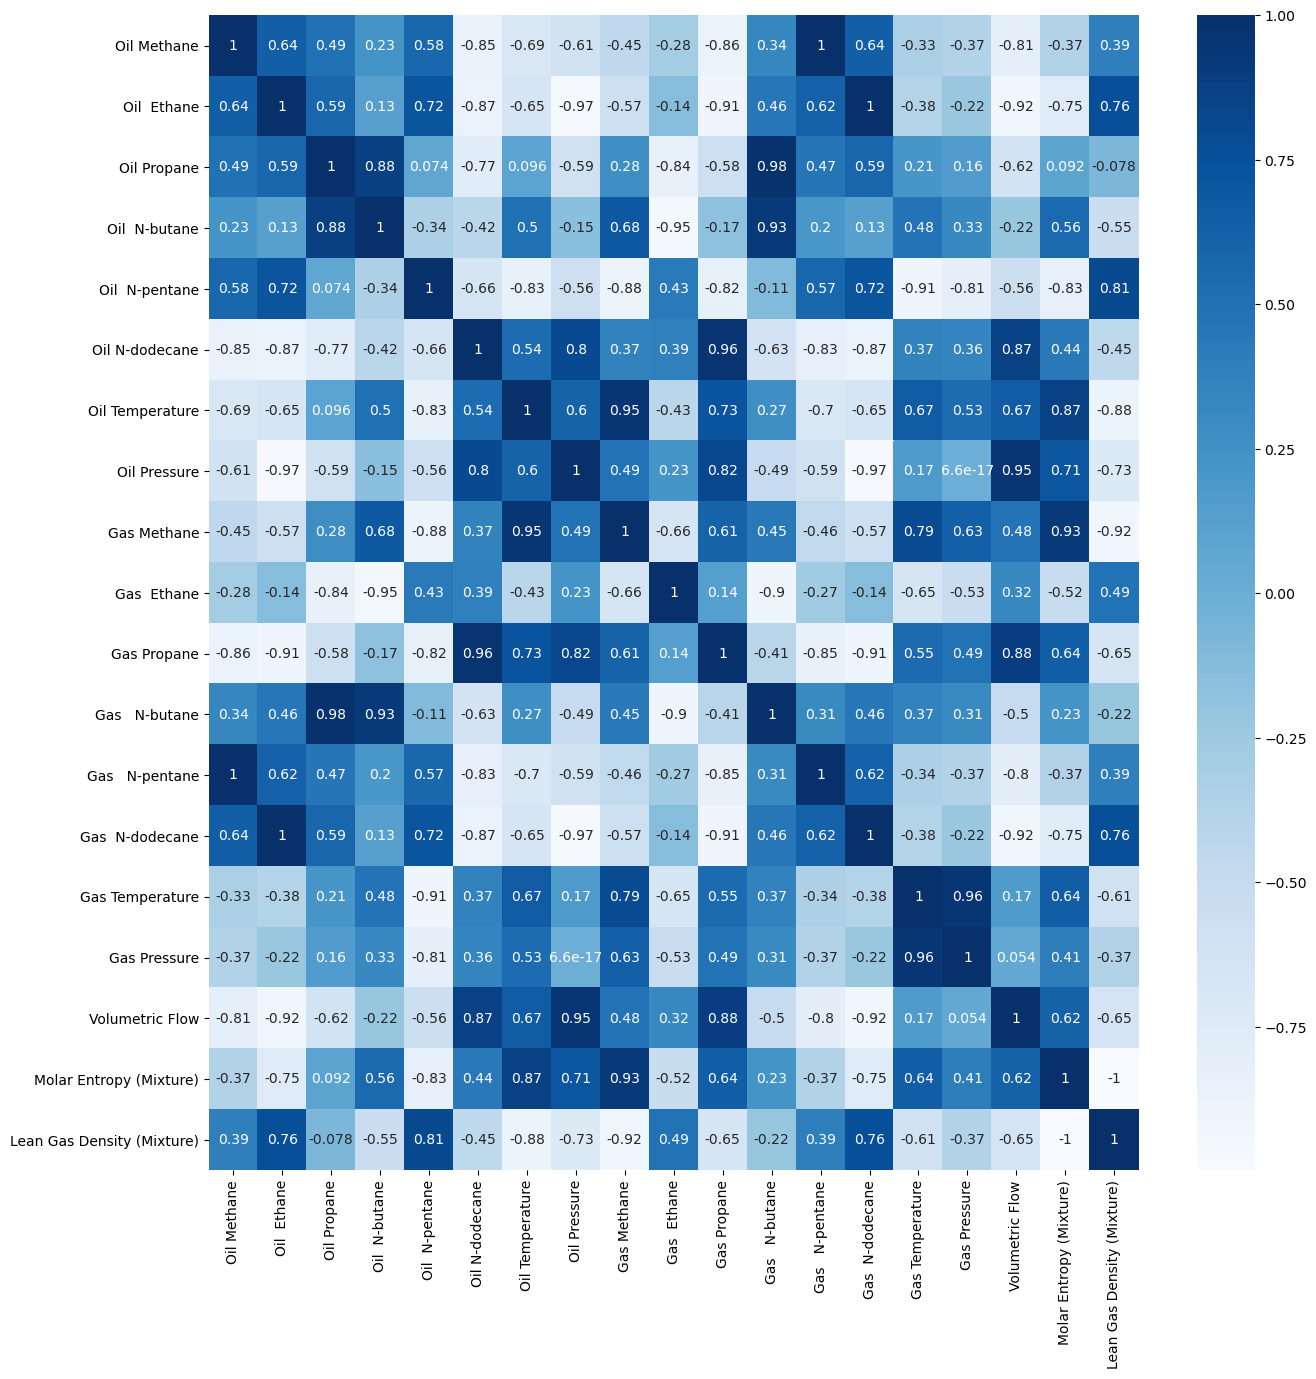

In [192]:
plt.figure(figsize=(15,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [210]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(data.values)
df = pd.DataFrame(df, columns=data.columns)
df=data

In [211]:
X=df.iloc[: , :16]
y=df.iloc[: , 16:19]

In [212]:
y

,Volumetric Flow,Molar Entropy (Mixture),Lean Gas Density (Mixture)
0,1637.1100,11.91090,1.31249
1,1002.8300,-11.43670,3.58983
2,550.9950,7.04624,6.53364
3,310.6440,-3.85933,11.58880
4,24.1024,-477.62300,149.36300


In [213]:
X_train, X_test = X.iloc[0:3 , :16], X.iloc[3:5 , :16]
y_train, y_test = y.iloc[0:3 , 0:3], y.iloc[3:5 , 0:3]


In [214]:
batch_size = 1 #1
model = Sequential()

model.add(Dense(units=20, input_dim=X_train.shape[1], activation="relu"))#input dim is 4 as the timeseries steps.
model.add(Dense(20, activation="relu"))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_25 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 63        
Total params: 823
Trainable params: 823
Non-trainable params: 0
_________________________________________________________________


In [215]:
model.fit(X_train,y_train, epochs=30, batch_size=batch_size, verbose=2)

Epoch 1/30
3/3 - 0s - loss: 447148.9062
Epoch 2/30
3/3 - 0s - loss: 446739.6250
Epoch 3/30
3/3 - 0s - loss: 446384.7500
Epoch 4/30
3/3 - 0s - loss: 445956.5312
Epoch 5/30
3/3 - 0s - loss: 445650.0938
Epoch 6/30
3/3 - 0s - loss: 445244.1250
Epoch 7/30
3/3 - 0s - loss: 444927.0000
Epoch 8/30
3/3 - 0s - loss: 444548.2500
Epoch 9/30
3/3 - 0s - loss: 444303.8750
Epoch 10/30
3/3 - 0s - loss: 443946.9688
Epoch 11/30
3/3 - 0s - loss: 443698.8750
Epoch 12/30
3/3 - 0s - loss: 443387.2188
Epoch 13/30
3/3 - 0s - loss: 443143.6250
Epoch 14/30
3/3 - 0s - loss: 442929.1250
Epoch 15/30
3/3 - 0s - loss: 442778.7188
Epoch 16/30
3/3 - 0s - loss: 442584.4062
Epoch 17/30
3/3 - 0s - loss: 442437.2500
Epoch 18/30
3/3 - 0s - loss: 442274.8438
Epoch 19/30
3/3 - 0s - loss: 442087.9062
Epoch 20/30
3/3 - 0s - loss: 441901.8438
Epoch 21/30
3/3 - 0s - loss: 441735.9062
Epoch 22/30
3/3 - 0s - loss: 441519.5938
Epoch 23/30
3/3 - 0s - loss: 441377.9688
Epoch 24/30
3/3 - 0s - loss: 441198.8438
Epoch 25/30
3/3 - 0s - lo

In [216]:
trainPredict = model.predict(X_train, batch_size=batch_size)
testPredict = model.predict(X_test, batch_size=batch_size)

In [217]:
ytr2d = np.reshape(y_train, (y_train.shape[0], 3))
yte2d = np.reshape(y_test, (y_test.shape[0], 3))

In [218]:
trainPredict=pd.DataFrame(trainPredict)
testPredict=pd.DataFrame(testPredict)

In [219]:
print("Test MSE: ", mean_squared_error(testY, testPredict))
print("Test R2: ", r2_score(testY, testPredict))

Test MSE:  25.201762798094972
Test R2:  -1978.435268369003


In [225]:
row = [0.5,0.3,0.2,0,0,10,16,0,1,0,0,0,0,0,15,20]
new = np.asarray([row])
new = scaler.fit_transform(new)
pr_y = model.predict(new)
#pr_y=scaler.inverse_transform(pr_y)
print('Predicted: %s' % pr_y[0])

Predicted: [ 0.12981321 -0.01316515  0.04664521]
